<a href="https://colab.research.google.com/github/rhulverm08/-Air-Quality-Health-Alert-Index-AQHAI-/blob/main/Marketing_Campaign_Performance_%26_ROI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign Performance & ROI Analysis

### Objective
Analyze marketing campaign data to evaluate ROI, conversion efficiency,
and channel performance using Python and data visualization.


## Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np


## Load Dataset

In this step, the marketing campaign CSV file is loaded into a pandas DataFrame.


In [ ]:
df = pd.read_csv("marketing_campaign_roi_data.csv")


In [ ]:
df.head()

,campaign_id,campaign_name,channel,ad_spend,impressions,clicks,conversions,revenue,start_date,end_date
0,1,Campaign_1,Email Marketing,128805,924931,23308,1226,4713970,2023-01-11,2023-01-29
1,2,Campaign_2,LinkedIn Ads,98846,351922,12723,1080,3027240,2023-04-20,2023-05-07
2,3,Campaign_3,Instagram Ads,27927,302745,10082,1180,4367180,2023-01-16,2023-01-31
3,4,Campaign_4,LinkedIn Ads,125589,1314416,29351,2733,2888781,2023-02-02,2023-02-26
4,5,Campaign_5,LinkedIn Ads,120657,1780921,93513,2882,12274438,2023-08-21,2023-09-17


## Initial Data Exploration

Check dataset size, column names, data types, and basic statistics.


In [ ]:
df.shape

(5000, 10)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    5000 non-null   int64 
 1   campaign_name  5000 non-null   object
 2   channel        5000 non-null   object
 3   ad_spend       5000 non-null   int64 
 4   impressions    5000 non-null   int64 
 5   clicks         5000 non-null   int64 
 6   conversions    5000 non-null   int64 
 7   revenue        5000 non-null   int64 
 8   start_date     5000 non-null   object
 9   end_date       5000 non-null   object
dtypes: int64(6), object(4)
memory usage: 390.8+ KB


In [ ]:
df.describe()


,campaign_id,ad_spend,impressions,clicks,conversions,revenue
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,101756.658600,1.023392e+06,45970.952000,3958.564200,1.145008e+07
std,1443.520003,55884.519175,5.712166e+05,34871.013798,3705.157849,1.252449e+07
min,1.000000,5028.000000,2.020900e+04,330.000000,7.000000,3.296000e+04
25%,1250.750000,53134.750000,5.342490e+05,17976.250000,1201.750000,2.996190e+06
50%,2500.500000,102188.000000,1.026448e+06,37085.500000,2738.500000,7.028860e+06
75%,3750.250000,149413.750000,1.523555e+06,67143.500000,5619.500000,1.537060e+07
max,5000.000000,199999.000000,1.998649e+06,156513.000000,21135.000000,9.919228e+07


## Date Formatting

Convert start_date and end_date columns into datetime format.


In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])


## Feature Engineering

Create key marketing metrics such as CTR, Conversion Rate, and ROI.


In [ ]:
df['CTR'] = df['clicks'] / df['impressions']


In [ ]:
df['conversion_rate'] = df['conversions'] / df['clicks']


In [ ]:
df['ROI'] = (df['revenue'] - df['ad_spend']) / df['ad_spend']


In [ ]:
df[['ad_spend', 'revenue', 'CTR', 'conversion_rate', 'ROI']].head()


,ad_spend,revenue,CTR,conversion_rate,ROI
0,128805,4713970,0.025200,0.052600,35.597725
1,98846,3027240,0.036153,0.084886,29.625822
2,27927,4367180,0.033302,0.117040,155.378415
3,125589,2888781,0.022330,0.093114,22.001863
4,120657,12274438,0.052508,0.030819,100.730012


## Channel-wise Average ROI

This chart compares average ROI across different marketing channels.


In [ ]:
channel_roi = df.groupby('channel')['ROI'].mean().reset_index()
channel_roi


,channel,ROI
0,Email Marketing,241.659800
1,Facebook Ads,216.786232
2,Google Ads,211.341927
3,Instagram Ads,212.338164
4,LinkedIn Ads,237.948802


##**Business Question:** Which marketing channel delivers the highest return on investment?


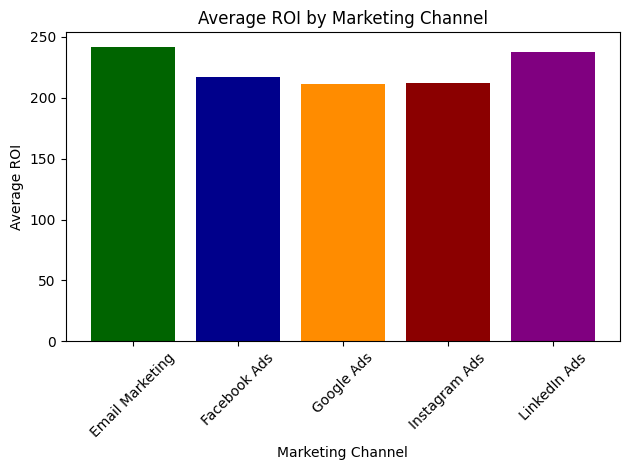

In [ ]:
colors = ['darkgreen', 'darkblue', 'darkorange', 'darkred', 'purple']

plt.figure()
plt.bar(channel_roi['channel'], channel_roi['ROI'], color=colors)
plt.xlabel("Marketing Channel")
plt.ylabel("Average ROI")
plt.title("Average ROI by Marketing Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ROI Distribution by Channel

Box plots are used to understand ROI consistency and risk across channels.


In [ ]:
channel_perf = df.groupby('channel')[['ad_spend', 'revenue']].mean().reset_index()
channel_perf


,channel,ad_spend,revenue
0,Email Marketing,101295.407334,1.209793e+07
1,Facebook Ads,102218.328497,1.105587e+07
2,Google Ads,99957.627085,1.141051e+07
3,Instagram Ads,103820.786368,1.121896e+07
4,LinkedIn Ads,101584.848633,1.144445e+07


## Conversion Rate by Channel

This visualization highlights channel efficiency in converting clicks to customers.


Business Question: Which marketing channel delivers the best return on investment?


<Figure size 640x480 with 0 Axes>

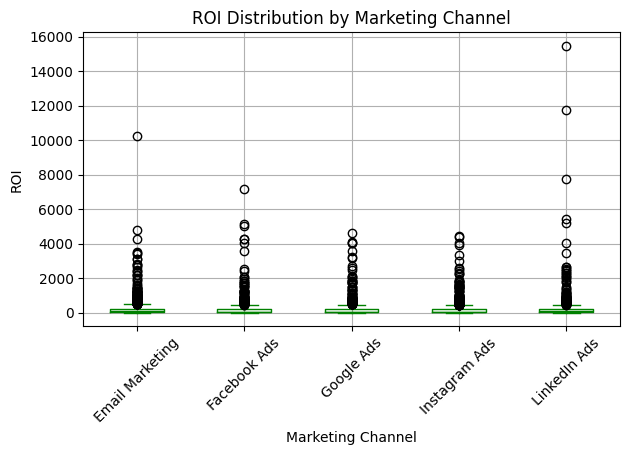

In [ ]:
import matplotlib.pyplot as plt
df_plot = df[df['ROI'] < 5]  # keep realistic ROI range

plt.figure()
df.boxplot(column='ROI', by='channel', color='green')
plt.xlabel("Marketing Channel")
plt.ylabel("ROI")
plt.title("ROI Distribution by Marketing Channel")
plt.suptitle("")   # extra title remove
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['ROI_status'] = df['ROI'].apply(lambda x: 'Profitable' if x > 0 else 'Loss Making')


In [ ]:
roi_summary = df['ROI_status'].value_counts().reset_index()
roi_summary.columns = ['ROI_status', 'campaign_count']
roi_summary


,ROI_status,campaign_count
0,Profitable,4980
1,Loss Making,20


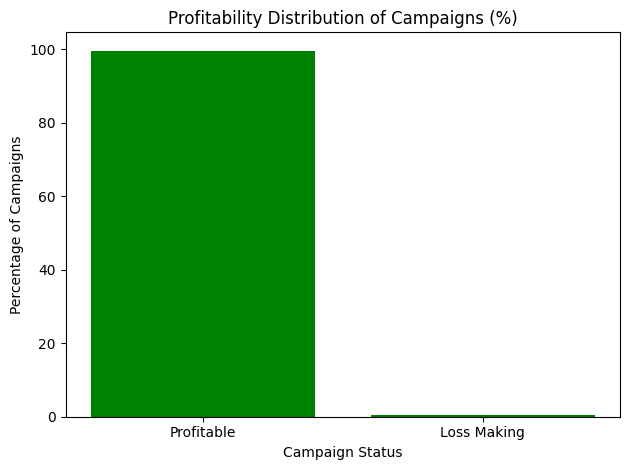

In [ ]:
roi_pct = df['ROI_status'].value_counts(normalize=True) * 100
roi_pct = roi_pct.reset_index()
roi_pct.columns = ['ROI_status', 'percentage']

plt.figure()
plt.bar(roi_pct['ROI_status'], roi_pct['percentage'], color='green')
plt.xlabel("Campaign Status")
plt.ylabel("Percentage of Campaigns")
plt.title("Profitability Distribution of Campaigns (%)")
plt.tight_layout()
plt.show()


## Limitations

- Dataset is simulated and may not reflect real-world campaign noise
- ROI values include extreme outliers
- Analysis does not include time-based trends or attribution modeling


## Conclusion

- Email and LinkedIn channels show more stable and consistent ROI performance  
- Some paid ad channels generate high spend but inconsistent returns  
- Conversion rate analysis highlights efficiency differences across channels  
- ROI-based segmentation helps optimize marketing budget allocation and reduce losses  
